# Simple Linear Regression Example

In [1]:
import numpy as np
import tensorflow as tf

/home/tammy/.virtualenvs/vision36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
np.random.seed(101) # fix the random values generated to make the session repeatable
tf.set_random_seed(101)

In [21]:
rand_a = np.random.uniform(0, 100, (5,5))

In [22]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [23]:
rand_b = np.random.uniform(0,100, (5,1))

In [24]:
a = tf.placeholder(tf.float32)

In [25]:
b = tf.placeholder(tf.float32)

In [26]:
tf.multiply # element wise

<function tensorflow.python.ops.math_ops.multiply>

In [27]:
add_op = a + b

In [28]:
mul_op = a * b

In [30]:
with tf.Session() as sess:
    # pass in placeholder operation as first arg, and values in a feed dict as second arg
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b}) 
    print(add_result)
    mult_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [31]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [14]:
n_features = 10
n_dense_neurons = 3

In [32]:
x = tf.placeholder(tf.float32, (None, n_features))

In [33]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [39]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)
a = tf.sigmoid(z)

In [40]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})
    

In [41]:
print(layer_out)

[[0.02519322 0.95843285 0.04612376]]


In [44]:
## Simple regression problem

In [45]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [46]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [47]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

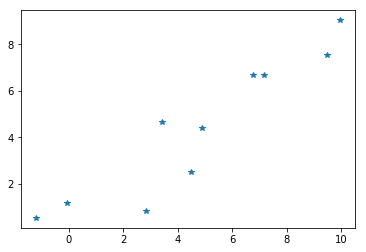

In [50]:
plt.plot(x_data, y_label, '*')

In [51]:
# y = mx+b

In [52]:
np.random.rand(2)
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [55]:
error = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x+b
    error += (y-y_hat)**2     # cost function
    

In [56]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [58]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    # how many training steps to take
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

In [59]:
x_test = np.linspace(-1,11,10)

#y = mx+b
y_pred_plot = final_slope*x_test + final_intercept

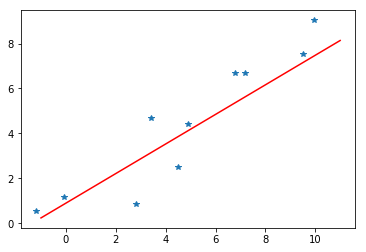

In [60]:
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')

# More realistic regression example with estimator

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [68]:
# creating way more data points and adding noise
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [70]:
# y = mx+b; b=5
y_true = (0.5*x_data) +5 + noise  # create a noisy line 

In [73]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)   # concat along the column

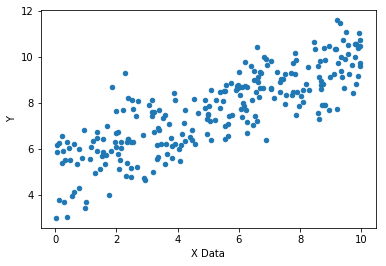

In [75]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')   # random samples to hep create plot


In [76]:
# make TF try to fit a line
# 1. Define Variables
# 2. Define placeholders
# 3. Define graph/operation
# 4. Define optimizer
# 5. Initialize variables
# 6. Train

### Batching

In [77]:
batch_size = 8
# initiate slope and intercept with random numbers
m = tf.Variable(0.81)
b=tf.Variable(0.17)

In [78]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])
y_model = m*xph + b    # graph or operation
error = tf.reduce_sum(tf.square(yph-y_model))

In [80]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [81]:
init = tf.global_variables_initializer()

In [82]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        # choose batchsize number of random points
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b]) 


In [99]:
rand_ind = np.random.randint(len(x_data), size=batch_size)
rand_ind


array([ 58692, 645677, 212173, 270618,  80577, 876231, 721366, 127002])

In [84]:
b

<tf.Variable 'Variable_7:0' shape=() dtype=float32_ref>

In [85]:
model_b

4.922171

In [86]:
y_hat = x_data*model_m + model_b

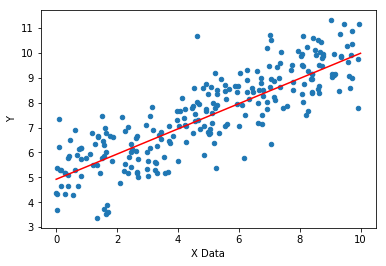

In [88]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

In [89]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [91]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpotr59q6t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1a082cd0b8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [92]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)
print(x_train.shape, x_eval.shape)

(700000,) (300000,)


In [104]:
# input to estimator basically replaces the batching preparation
# using numpy input function, alternative: pandas input function
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=None, shuffle=True)
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=1000, shuffle=False)
eval_input_func =  tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, 
                                                batch_size=8, num_epochs=1000, shuffle=False)

In [105]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpotr59q6t/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmpotr59q6t/model.ckpt.
INFO:tensorflow:loss = 3.9461455, step = 1001
INFO:tensorflow:global_step/sec: 1027.64
INFO:tensorflow:loss = 6.2932196, step = 1101 (0.101 sec)
INFO:tensorflow:global_step/sec: 945.969
INFO:tensorflow:loss = 9.30118, step = 1201 (0.104 sec)
INFO:tensorflow:global_step/sec: 969.577
INFO:tensorflow:loss = 9.390989, step = 1301 (0.102 sec)
INFO:tensorflow:global_step/sec: 968.567
INFO:tensorflow:loss = 4.4436245, step = 1401 (0.104 sec)
INFO:tensorflow:global_step/sec: 1015.06
INFO:tensorflow:loss = 4.4561505, step = 1501 (0.099 sec)
INFO:tensorflow:global_step/sec: 1003.08
INFO:tensorflow:loss = 3.7643132, step = 1601 (0.100 sec)
INFO:tensorflow:global_step/sec: 953.036
INFO:tensorflow:loss = 21.95139, step = 1701 (0.103 sec)
INFO:tensorflow:global_step/sec: 1084.54
INFO:tensorflow:loss = 6.48

In [106]:
train_metrics = estimator.evaluate(train_input_func, steps=1000)   # do not want to shuffle anything to evaluate

INFO:tensorflow:Starting evaluation at 2018-04-14-22:56:40
INFO:tensorflow:Restoring parameters from /tmp/tmpotr59q6t/model.ckpt-2000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-14-22:56:41
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0253962, global_step = 2000, loss = 8.20317


In [107]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)    # test metrics

INFO:tensorflow:Starting evaluation at 2018-04-14-22:57:59
INFO:tensorflow:Restoring parameters from /tmp/tmpotr59q6t/model.ckpt-2000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-14-22:58:00
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0266472, global_step = 2000, loss = 8.213178


In [108]:
print(train_metrics)

{'average_loss': 1.0253962, 'loss': 8.20317, 'global_step': 2000}


In [109]:
print(eval_metrics)   # training data loss similar to eval data loss, low loss.

{'average_loss': 1.0266472, 'loss': 8.213178, 'global_step': 2000}


In [112]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)


In [114]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmpotr59q6t/model.ckpt-2000


[{'predictions': array([4.900576], dtype=float32)},
 {'predictions': array([5.4654593], dtype=float32)},
 {'predictions': array([6.0303426], dtype=float32)},
 {'predictions': array([6.595226], dtype=float32)},
 {'predictions': array([7.160109], dtype=float32)},
 {'predictions': array([7.724992], dtype=float32)},
 {'predictions': array([8.289875], dtype=float32)},
 {'predictions': array([8.854758], dtype=float32)},
 {'predictions': array([9.4196415], dtype=float32)},
 {'predictions': array([9.984526], dtype=float32)}]

In [115]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmpotr59q6t/model.ckpt-2000


In [116]:
predictions

[array([4.900576], dtype=float32),
 array([5.4654593], dtype=float32),
 array([6.0303426], dtype=float32),
 array([6.595226], dtype=float32),
 array([7.160109], dtype=float32),
 array([7.724992], dtype=float32),
 array([8.289875], dtype=float32),
 array([8.854758], dtype=float32),
 array([9.4196415], dtype=float32),
 array([9.984526], dtype=float32)]

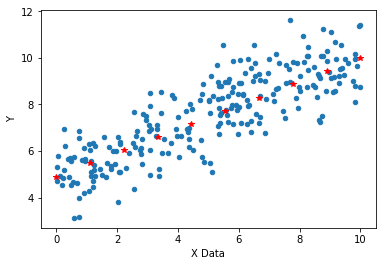

In [118]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')

# Forest Type Multi-class Classification

##### Downloaded the dataset from UCI website : https://archive.ics.uci.edu/ml/datasets/covertype
Thought it may be interesting to try and design a ML classification problem and try to predict the forest cover type. There are 4 distinct cover types in this dataset. 

In [15]:
import pandas as pd
import os
from os import path as osp
import tensorflow as tf

In [16]:
folder = '/home/tammy/Downloads/Forest_types'

In [17]:
train = pd.read_csv(osp.join(folder, 'training.csv'))

In [18]:
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [19]:
test = pd.read_csv(osp.join(folder, 'testing.csv'))
dataset = tf.data.TextLineDataset(osp.join(folder, 'testing.csv'))

In [20]:
all_data = pd.concat([train, test])

In [21]:
cols_to_norm = [x for x in all_data.columns if x!='class']

In [22]:
all_data[cols_to_norm] = all_data[cols_to_norm].apply(lambda x: ((x-x.min())/x.max()-x.min()))

In [23]:
all_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,-30.925234,-22.91875,-46.948980,-53.784884,-42.84,-82.869565,-41.633094,-18.904762,-44.868421,...,64.117161,35.784308,9.355377,11.858575,50.657234,3.755465,9.377208,37.311662,9.285158,11.211258
1,h,-30.504673,-22.95625,-46.948980,-53.662791,-42.92,-82.891304,-41.640288,-18.916667,-44.850877,...,64.127599,36.201462,9.349759,11.882999,51.848723,3.642093,9.377208,37.063706,8.870000,10.830000
2,s,-30.794393,-22.98750,-46.989796,-53.738372,-42.92,-82.927536,-41.697842,-18.916667,-44.885965,...,64.211106,36.269688,9.362600,12.101452,52.412553,4.081047,9.755381,38.001035,9.409593,11.312670
3,s,-30.738318,-22.98125,-46.989796,-53.715116,-42.96,-82.934783,-41.712230,-18.928571,-44.903509,...,64.643257,36.688791,9.303210,11.870787,50.125319,3.540349,9.270609,36.058256,8.969548,10.832567
4,d,-30.757009,-22.83750,-46.903061,-53.715116,-42.79,-82.833333,-41.482014,-18.892857,-44.877193,...,64.056618,35.135185,9.374639,12.104166,49.215745,3.973488,9.549797,37.221744,9.563439,11.470565


In [25]:
all_data.columns

Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')

In [26]:
numerics = cols_to_norm
for i, col in enumerate(cols_to_norm):
    numerics[i] = (tf.feature_column.numeric_column(col))

b1 = tf.feature_column.numeric_column("b1")
b2 = tf.feature_column.numeric_column("b2")

In [80]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore") 

#full list of classes
category_classes = all_data['class']
category_classes = category_classes.reshape(category_classes.shape[0],1)
#print(category_classes)
#using a label encoder, and binarizer to convert all unique category_ids to have a column for each class 
le = preprocessing.LabelEncoder() 
lb = preprocessing.LabelBinarizer()

le.fit(all_data['class'])
y_encoded = le.transform(all_data['class'])

lb.fit(y_encoded)
labels = lb.transform(y_encoded)
print(labels)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]]


In [81]:
from sklearn.model_selection import train_test_split
x_data = all_data.drop('class', axis=1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
...     x_data, labels , test_size=0.33, random_state=42)



In [32]:
import numpy as np
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"b1": np.array(X_train['b1']),
       "b2": np.array(X_train['b2'])},
    y=y_train[:,0].astype(np.float32),
    num_epochs=None,
    shuffle=True)
X_train.shape
y_train.shape

(350, 4)

In [223]:
results = classifier.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-06-17:04:25
INFO:tensorflow:Restoring parameters from /tmp/tmp28a9nw5b/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-06-17:05:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.69942194, accuracy_baseline = 0.699422, auc = 0.5368722, auc_precision_recall = 0.227957, average_loss = 0.6122155, global_step = 1000, label/mean = 0.30057803, loss = 6.122155, prediction/mean = 0.26860216


In [62]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [63]:
predictions = list(model.predict(pred_input_func))

INFO:tensorflow:Restoring parameters from /tmp/tmpARr15W/model.ckpt-1000


In [64]:
predictions

[{'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.3040337], dtype=float32),
  'logits': array([-0.82816267], dtype=float32),
  'probabilities': array([0.69596624, 0.3040337 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.3072061], dtype=float32),
  'logits': array([-0.8132137], dtype=float32),
  'probabilities': array([0.6927939, 0.3072061], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.30421323], dtype=float32),
  'logits': array([-0.8273144], dtype=float32),
  'probabilities': array([0.6957868 , 0.30421323], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.30366597], dtype=float32),
  'logits': array([-0.8299012], dtype=float32),
  'probabilities': array([0.69633406, 0.30366597], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),

In [227]:
# Keras multi-class classification
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=27, activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=333)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 34.57% (10.26%)


In [35]:
print(X_train.shape, y_train.shape)

(350, 27) (350, 4)


In [8]:
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [75]:
num_labels = 4 # number of classes
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

data = X_train.as_matrix().astype(np.float32)
labels = np.array(y_train).astype(np.float32)


In [76]:
feature_size = data.shape[1]

graph = tf.Graph()

with graph.as_default():
    tf_train_dataset = tf.constant(data)
    tf_train_labels = tf.constant(labels)

    weights = tf.Variable(tf.truncated_normal([feature_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))

    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=tf.matmul(tf_train_dataset, weights) + biases, 
                                                labels=tf_train_labels))

    optimizer = tf.train.AdamOptimizer(0.1).minimize(loss)
    train_prediction = tf.nn.softmax(logits)

In [78]:
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(10001):
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if step % 500 == 0:
            print('step:{} loss:{:.6f} accuracy: {:.2f}'.format(
                    step, l, accuracy(predictions, labels)))
print(predictions, labels)

step:0 loss:89.840698 accuracy: 30.57
step:500 loss:8.520969 accuracy: 42.86
step:1000 loss:17.680866 accuracy: 42.86
step:1500 loss:38.540817 accuracy: 24.29
step:2000 loss:13.424989 accuracy: 31.71
step:2500 loss:14.652645 accuracy: 30.57
step:3000 loss:15.658694 accuracy: 40.00
step:3500 loss:19.911228 accuracy: 43.43
step:4000 loss:29.969830 accuracy: 38.86
step:4500 loss:23.135708 accuracy: 38.86
step:5000 loss:10.527897 accuracy: 41.71
step:5500 loss:22.140282 accuracy: 40.57
step:6000 loss:7.266673 accuracy: 40.57
step:6500 loss:20.463501 accuracy: 48.86
step:7000 loss:2.098557 accuracy: 62.86
step:7500 loss:3.226445 accuracy: 54.57
step:8000 loss:17.667854 accuracy: 39.14
step:8500 loss:0.669783 accuracy: 86.00
step:9000 loss:0.632440 accuracy: 85.71
step:9500 loss:15.092363 accuracy: 31.71
step:10000 loss:15.055720 accuracy: 31.71
[[9.99999046e-01 3.76364044e-12 4.69294773e-31 1.00967850e-06]
 [9.99988198e-01 3.77002457e-11 1.68010398e-30 1.17577902e-05]
 [9.99869585e-01 5.690